In [ ]:
!pip install perceval-quandela

In [ ]:
from perceval.components.unitary_components import PS, BS, PERM
import perceval as pcvl
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# define our generator class
class Generator:
 def __init__(self, n):
   self.n = n


 def create(self):
   qc = pcvl.Circuit(self.n, name = "Generator")
   qc.add(1, PS(phi=pcvl.P('gen_phi_1')))
   qc.add(2, PS(phi=pcvl.P('gen_phi_2')))
   qc.add(3, PS(phi=pcvl.P('gen_phi_3')))


   # mzi
   qc.add(0, BS()).add(0, PS(phi=pcvl.P('gen_phi_4'))).add(0, BS())
   qc.add(2, BS()).add(2, PS(phi=pcvl.P('gen_phi_5'))).add(2, BS())


   qc.add(1, PS(phi=pcvl.P('gen_phi_6')))
   qc.add(1, BS()).add(1, PS(phi=pcvl.P('gen_phi_7'))).add(1, BS())


   qc.add(0, BS()).add(0, PS(phi=pcvl.P('gen_phi_8'))).add(0, BS())
   qc.add(2, BS()).add(2, PS(phi=pcvl.P('gen_phi_9'))).add(2, BS())


   qc.add(0, PS(phi=pcvl.P('gen_phi_10')))
   qc.add(1, PS(phi=pcvl.P('gen_phi_11')))
   qc.add(2, PS(phi=pcvl.P('gen_phi_12')))


   # ----
   qc.add(1+4, PS(phi=pcvl.P('gen_phi_13')))
   qc.add(2+4, PS(phi=pcvl.P('gen_phi_14')))
   qc.add(3+4, PS(phi=pcvl.P('gen_phi_15')))


   # mzi
   qc.add(0+4, BS()).add(0+4, PS(phi=pcvl.P('gen_phi_16'))).add(0+4, BS())
   qc.add(2+4, BS()).add(2+4, PS(phi=pcvl.P('gen_phi_17'))).add(2+4, BS())


   qc.add(1+4, PS(phi=pcvl.P('gen_phi_18')))
   qc.add(1+4, BS()).add(1+4, PS(phi=pcvl.P('gen_phi_19'))).add(1+4, BS())


   qc.add(0+4, BS()).add(0+4, PS(phi=pcvl.P('gen_phi_20'))).add(0+4, BS())
   qc.add(2+4, BS()).add(2+4, PS(phi=pcvl.P('gen_phi_21'))).add(2+4, BS())


   qc.add(0+4, PS(phi=pcvl.P('gen_phi_22')))
   qc.add(1+4, PS(phi=pcvl.P('gen_phi_23')))
   qc.add(2+4, PS(phi=pcvl.P('gen_phi_24')))


   return qc

In [ ]:
# define our discriminator class
class Discriminator:
 def __init__(self, n):
   self.n = n


 def create(self):
   qc = pcvl.Circuit(self.n, name = "Discriminator")
   qc.add(0, PS(phi=pcvl.P('dis_phi_1')))
   qc.add(1, PS(phi=pcvl.P('dis_phi_2')))
   qc.add(2, PS(phi=pcvl.P('dis_phi_3')))


   # mzi
   qc.add(0, BS()).add(0, PS(phi=pcvl.P('dis_phi_4'))).add(0, BS())
   qc.add(2, BS()).add(2, PS(phi=pcvl.P('dis_phi_5'))).add(2, BS())


   qc.add(1, BS()).add(1, PS(phi=pcvl.P('dis_phi_6'))).add(1, BS())

   # ----


   qc.add(0+4, PS(phi=pcvl.P('dis_phi_7')))
   qc.add(1+4, PS(phi=pcvl.P('dis_phi_8')))
   qc.add(2+4, PS(phi=pcvl.P('dis_phi_9')))


   # mzi
   qc.add(0+4, BS()).add(0+4, PS(phi=pcvl.P('dis_phi_10'))).add(0+4, BS())
   qc.add(2+4, BS()).add(2+4, PS(phi=pcvl.P('dis_phi_11'))).add(2+4, BS())


   qc.add(1+4, BS()).add(1+4, PS(phi=pcvl.P('dis_phi_12'))).add(1+4, BS())


   return qc

In [ ]:
gen = Generator(8).create()
dis = Discriminator(8).create()

In [ ]:
genparams={}
for i in range(1,25):
  genparams[f"gen_phi_{i}"]=random.uniform(0, 2*np.pi)
disparams={}
for i in range(1,13):
  disparams[f"dis_phi_{i}"]=random.uniform(0, 2*np.pi)

In [ ]:
gen.assign(genparams)
dis.assign(disparams)
chip = pcvl.Circuit(8, name = "Chip").add(0, gen).add(0, dis)

In [ ]:
initial_paper_state = pcvl.utils.StateVector(pcvl.BasicState('|1,0,0,0,1,0,0,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,1,0,0,0,1,0,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,0,1,0,0,0,1,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,0,0,1,0,0,0,1>'))
true_paper_state = pcvl.utils.StateVector(pcvl.BasicState('|1,0,0,0,0,1,0,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,1,0,0,0,0,1,0>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,0,1,0,0,0,0,1>'))+pcvl.utils.StateVector(pcvl.BasicState('|0,0,0,1,1,0,0,0>'))

In [ ]:
def prop_state_thru_chip(initial_paper_state,genparams,disparams):
  gen.assign(genparams)
  dis.assign(disparams)
  chip=pcvl.Circuit(8,name="Chip").add(0,gen).add(0,dis)
  processor1 = pcvl.Processor("SLOS", chip)
  processor1.with_input(initial_paper_state)
  sampler=pcvl.algorithm.Sampler(processor1)
  fprob_init = sampler.probs()['results'][pcvl.BasicState('|0,0,1,0,0,0,1,0>')] # of |2, 2>, per paper (can optimize later)
  return fprob_init

def prop_state_thru_gen(initial_paper_state,genparams):
  gen.assign(genparams)
  processor3 = pcvl.Processor("SLOS", gen)
  processor3.with_input(initial_paper_state)
  sampler=pcvl.algorithm.Sampler(processor3)
  prob_init = sampler.probs()['results'][pcvl.BasicState('|0,0,1,0,0,0,1,0>')] # of |2, 2>, per paper (can optimize later)
  return prob_init,sampler

def prop_state_thru_dis(true_paper_state,disparams):
  dis.assign(disparams)
  processor2 = pcvl.Processor("SLOS", dis)
  processor2.with_input(true_paper_state)
  sampler=pcvl.algorithm.Sampler(processor2)
  prob_true = sampler.probs()['results'][pcvl.BasicState('|0,0,1,0,0,0,1,0>')] # of |2, 2>, per paper (can optimize later)
  return prob_true,sampler

prop_init,gen_sampler =  prop_state_thru_gen(initial_paper_state,genparams)
prop_true,dis_sampler = prop_state_thru_dis(true_paper_state,disparams)

print("probability_init", prop_init)
print("probability_true", prop_true)
loss=prop_init-prop_true
print("initial_loss",loss)
oldgenparams=genparams.copy()
olddisparams=disparams.copy()

probability_init 0.06112485596988231
probability_true 0.07539110472805628
initial_loss -0.01426624875817397


In [ ]:
def loss_function(newgenparams,newdisparams):
  for i in range(1,25):
    genparams[f'gen_phi_{i}']=(newgenparams[f'gen_phi_{i}'])
  for i in range(1,13):
    disparams[f'dis_phi_{i}']=(newdisparams[f'dis_phi_{i}'])
  g_sampler=prop_state_thru_gen(initial_paper_state,newgenparams)
  g_sample=gen_sampler.samples(1)['results'][0]
  _,d_sampler=prop_state_thru_dis(g_sample,newdisparams)
  dist1=d_sampler.probs()['results'][pcvl.BasicState('|0,1,0,0,0,1,0,0>')]
  _,tau_d_sampler=prop_state_thru_dis(true_paper_state,newdisparams)
  dist2=tau_d_sampler.probs()['results'][pcvl.BasicState('|0,1,0,0,0,1,0,0>')]

  return dist1,dist2,dist1-dist2


In [ ]:
#step 1, calculate loss
_,_,current_loss=loss_function(genparams,disparams)

In [ ]:
#step 2, define the approximation to the derivative
def secant(genparams,disparams,h):
  tempgenparams=genparams.copy()
  tempdisparams=disparams.copy()
  for i in range(1,25):
    tempgenparams[f'gen_phi_{i}']=(genparams[f'gen_phi_{i}']+h)
  for i in range(1,13):
    tempdisparams[f'dis_phi_{i}']=(disparams[f'dis_phi_{i}']+h)
  _,_,added_loss=loss_function(tempgenparams,tempdisparams)

  for i in range(1,25):
    tempgenparams[f'gen_phi_{i}']=(genparams[f'gen_phi_{i}']-h)
  for i in range(1,13):
    tempdisparams[f'dis_phi_{i}']=(disparams[f'dis_phi_{i}']-h)
  _,_,subtracted_loss=loss_function(tempgenparams,tempdisparams)

  secant=(added_loss-subtracted_loss)/(2*h)
  return secant

In [ ]:
genparams=oldgenparams.copy()
disparams=olddisparams.copy()
hyperparameter_grid = {
    'num_epochs': [10, 15, 20],
    'learning_rate': [0.0001, 0.00001, 0.000001],
    'h': [0.0001, 0.00001, 0.000001]
}

best_loss = float('inf')  # Initialize with a large value
best_hyperparameters = {}
initial_gen_params=genparams.copy()
initial_dis_params=disparams.copy()
# Iterate through hyperparameter combinations
for num_epochs in hyperparameter_grid['num_epochs']:
    for learning_rate in hyperparameter_grid['learning_rate']:
        for h in hyperparameter_grid['h']:
            print(f"Optimizing with num_epochs={num_epochs}, learning_rate={learning_rate}, h={h}")

            # Reset parameters
            genparams = initial_gen_params.copy()
            disparams = initial_dis_params.copy()

            # Starting the loop
            prob_true, sampler = prop_state_thru_dis(true_paper_state, disparams)
            fprob_init = prop_state_thru_chip(initial_paper_state, genparams, disparams)

            # Tweak the parameters of the discriminator
            lossholder = []
            dist1holder = []
            dist2holder = []
            for counter in range(10):  # arbitrary limit
                print(counter)
                # Discriminator parameter updates
                for i in range(num_epochs):
                    slope = secant(genparams, disparams, h)
                    for j in range(1, 13):
                        disparams[f'dis_phi_{j}'] += np.random.uniform(-np.abs(learning_rate * slope),
                                                                        np.abs(learning_rate * slope))

                dis.assign(disparams)  # update the discriminator with the new parameters
                prob_init, sampler = prop_state_thru_gen(initial_paper_state, genparams)

                # Generator parameter updates
                for i in range(num_epochs):
                    slope = secant(genparams, disparams, h)
                    for j in range(1, 25):
                        genparams[f'gen_phi_{j}'] -= np.random.uniform(-np.abs(learning_rate * slope),
                                                                         np.abs(learning_rate * slope))

                gen.assign(genparams)

                # Construct the circuit
                chip = pcvl.Circuit(8, name="Chip").add(0, gen).add(0, dis)

                # Calculate loss and distances
                dist1, dist2, current_loss = loss_function(genparams, disparams)
                dist1holder.append(dist1)
                dist2holder.append(dist2)
                lossholder.append(current_loss)

            # Check if the current combination is better
            if current_loss < best_loss:
                best_loss = current_loss
                best_hyperparameters = {'num_epochs': num_epochs, 'learning_rate': learning_rate, 'h': h}

print("Best hyperparameters:", best_hyperparameters)

Optimizing with num_epochs=10, learning_rate=0.0001, h=0.0001
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Optimizing with num_epochs=10, learning_rate=0.0001, h=1e-05
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Optimizing with num_epochs=10, learning_rate=0.0001, h=1e-06
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Optimizing with num_epochs=10, learning_rate=1e-05, h=0.0001
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Optimizing with num_epochs=10, learning_rate=1e-05, h=1e-05
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Optimizing with num_epochs=10, learning_rate=1e-05, h=1e-06
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Optimizing with num_epochs=10, learning_rate=1e-06, h=0.0001
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Optimizing with num_epochs=10, learning_rate=1e-06, h=1e-05
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [ ]:
genparams=oldgenparams.copy()
disparams=olddisparams.copy()
#starting the loop
#step 1, propagate the true state through the discriminator
prob_true,sampler=prop_state_thru_dis(true_paper_state,disparams)
#step 2, propagate the initial state through the chip
fprob_init=prop_state_thru_chip(initial_paper_state,genparams,disparams)
#tweak the parameters of the discriminator
lossholder=[]
dist1holder=[]
dist2holder=[]
for counter in range(25): #arbitrary limit
  print(counter)
  num_epochs=20
  learning_rate=1e-6
  h=1e-6
  for i in range(num_epochs):
    slope=secant(genparams,disparams,h)
    for j in range(1,13):
      disparams[f'dis_phi_{j}']=disparams[f'dis_phi_{j}']+np.random.uniform(-np.abs(learning_rate*slope),np.abs(learning_rate*slope))

  dis.assign(disparams) #update the discriminator with the new parameters
  prob_init,sampler=prop_state_thru_gen(initial_paper_state,genparams)
  num_epochs=20
  learning_rate=1e-6
  h=1e-6
  for i in range(num_epochs):
    slope=secant(genparams,disparams,h)
    for j in range(1,25):
      genparams[f'gen_phi_{j}']=genparams[f'gen_phi_{j}']-np.random.uniform(-np.abs(learning_rate*slope),np.abs(learning_rate*slope))

  gen.assign(genparams)
  chip = pcvl.Circuit(8, name = "Chip").add(0, gen).add(0, dis)
  dist1,dist2,currentloss=loss_function(genparams,disparams)
  dist1holder.append(dist1)
  dist2holder.append(dist2)
  lossholder.append(currentloss)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


Text(0, 0.5, 'discriminator turn')

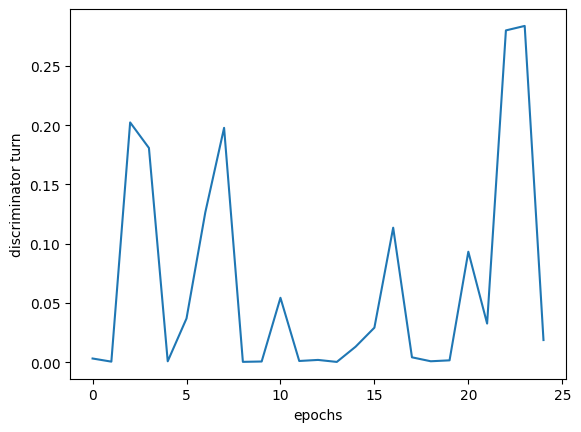

In [ ]:
plt.plot(dist1holder)
plt.xlabel('epochs')
plt.ylabel('discriminator turn')
plt.title('Discriminator Loss vs Epoch')

Text(0, 0.5, 'generator turn')

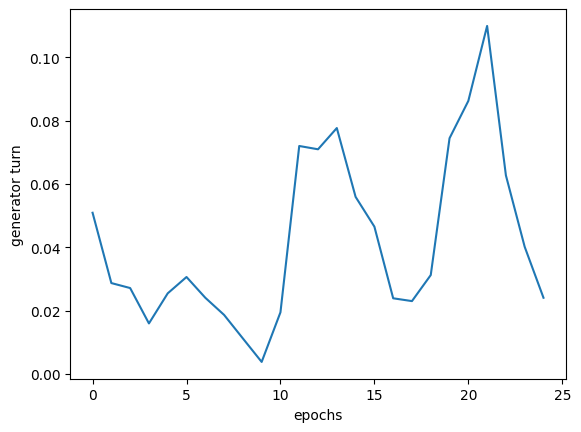

In [ ]:
plt.plot(dist2holder)
plt.xlabel('epochs')
plt.ylabel('generator turn')
plt.title('Generator Loss vs Epoch')

Text(0, 0.5, 'total loss')

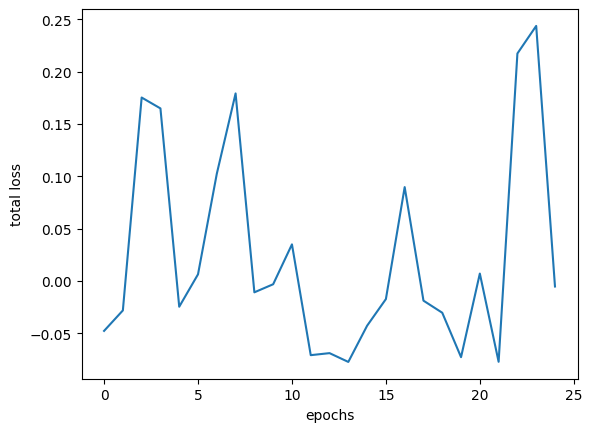

In [ ]:
plt.plot(lossholder)
plt.xlabel('epochs')
plt.ylabel('total loss')
plt.ylabel('Total Loss vs Epoch')

Text(0, 0.5, 'Loss')

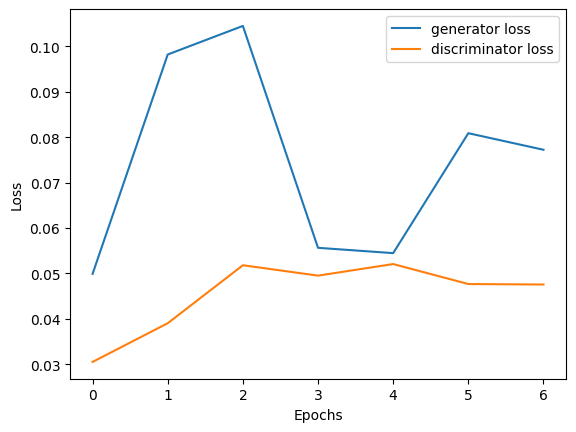

In [ ]:
plt.plot(dist1holder[0:7],label='generator loss')
plt.plot(dist2holder[0:7], label='discriminator loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
def fidelity():
  sum = 0
  sampler = pcvl.algorithm.Sampler(processor1)
  pdf = np.array(list(sampler.probs()['results'].values()))

  for i in range(len(pdf)):
    sum += pdf[i] * pdf [i]
  print(np.sqrt(sum))
  return np.sqrt(sum)

In [ ]:
gen.assign(genparams)
dis.assign(disparams)
chip=pcvl.Circuit(8,name="Chip").add(0,gen).add(0,dis)
processor1 = pcvl.Processor("SLOS", chip)
processor1.with_input(initial_paper_state)
sampler=pcvl.algorithm.Sampler(processor1)
fidelity()

0.32277941066929267


0.32277941066929267